<h1>Mode 15</h1>

In [39]:
import json
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import random

In [46]:
RuleBasedResults = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode15-dqn/results_experiment_rule_based.json'
SequentialResults = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode15-dqn/results_experiment_sequential_rollout.json'
#sequential_randSig = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode15-dqn/sequential_rollout_RAND.json'
sequential_randSig = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode15-dqn/sequential_rollout_RAND_15.json'

ApproxSeqRoll = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode15-dqn/Approx_Seq_New_15.json'

#ApproxSeqRoll = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode15-dqn/approx_sequential_rollout_69_1450.json'
cross_30 = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode15-dqn/approx_cross_rollout_3410_mode30.json'
cross_30_New = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode15-dqn/approx_cross_rollout_mode30_NEW.json'

cross_30_BM = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode15-dqn/approx_cross_rollout_4990_mode30.json'

cross_60 = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode15-dqn/approx_cross_rollout_4850_mode60.json'
cross_20  = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode15-dqn/approx_cross_9990_mode20.json'

adaptation_30_to_15_iter_1 = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode15-dqn/adaptation_30_to_15_iter_1.json'
adaptation_30_to_15_iter_2 = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode15-dqn/adaptation_30_to_15_iter_2.json'

def findMovingAvg(inputDF,window):
    movingAvgList = []
    for i in range(inputDF.shape[0] - window):
        newDF = inputDF.loc[i:i + window]
        epi = inputDF.iloc[i]['episode']
        meanVal = newDF['steps'].mean()
        movingAvgList.append({'episode':epi, 'smoothed_steps':meanVal})
    dfMovingAvg = pd.DataFrame(movingAvgList)
    return dfMovingAvg


def createShuffleList(inputFile, max_items=5000):
    with open(inputFile, 'r') as file:
        data = json.load(file)

    listOfWholeTraining = []
    epochs = list(data.keys())
    
    i = 0
    ruleBasedResultsPlot_mean = []
    ruleBasedResultsPlot_std = []
    for trainEpoch in epochs:
        listofSteps = []
        epochData = data[str(trainEpoch)]
        for indData in epochData:
            steps = indData['StepsToSolve']
            listofSteps.append(steps)
            listOfWholeTraining.append({"episode": i, "steps": steps})
            i += 1
        ruleBasedResultsPlot_mean.append(np.mean(listofSteps))    
        ruleBasedResultsPlot_std.append(np.std(listofSteps))   
    
    # Shuffle and repeat existing data to fill listOfWholeTraining up to 5000 items
    while len(listOfWholeTraining) < max_items:
        random.shuffle(listOfWholeTraining)  # Shuffle the current data
        extra_items = [{"episode": i + j, "steps": item["steps"]} for j, item in enumerate(listOfWholeTraining)]
        listOfWholeTraining.extend(extra_items)
        i += len(extra_items)
    
    # Trim listOfWholeTraining to exactly 5000 items if it exceeds
    listOfWholeTraining = listOfWholeTraining[:max_items]
    return listOfWholeTraining


def getMean_STD(inputFile):
    with open(inputFile, 'r') as file:
        data = json.load(file)
    listOfWholeTraining = []
    
    epochs = list(data.keys())
    i = 0
    ruleBasedResultsPlot_mean = []
    ruleBasedResultsPlot_std = []
    for trainEpoch in epochs:
        listofSteps = []
        epochData = data[str(trainEpoch)]
        for indData in epochData:
            steps = indData['StepsToSolve']
            listofSteps.append(steps)
            listOfWholeTraining.append({"episode": i, "steps": steps})
            i += 1
        ruleBasedResultsPlot_mean.append(np.mean(listofSteps))    
        ruleBasedResultsPlot_std.append(np.std(listofSteps))  
    return epochs, ruleBasedResultsPlot_mean, ruleBasedResultsPlot_std


def getMean_STD_SHORT(inputFile):

    newData = extendData(inputFile)

    listOfWholeTraining = []
    
    data = newData
    epochs = list(data.keys())
    
    i = 0
    ruleBasedResultsPlot_mean = []
    ruleBasedResultsPlot_std = []
    for trainEpoch in epochs:
        listofSteps = []
        epochData = data[str(trainEpoch)]
        for indData in epochData:
            steps = indData['StepsToSolve']
            listofSteps.append(steps)
            listOfWholeTraining.append({"episode": i, "steps": steps})
            i += 1
        ruleBasedResultsPlot_mean.append(np.mean(listofSteps))    
        ruleBasedResultsPlot_std.append(np.std(listofSteps))  


    return epochs, ruleBasedResultsPlot_mean, ruleBasedResultsPlot_std

def getDataFrame(inputFile):
    with open(inputFile, 'r') as file:
            data = json.load(file)
    listOfWholeTraining = []
    epochs = list(data.keys())
    
    i = 0
    for trainEpoch in epochs:
        epochData = data[str(trainEpoch)]
        for indData in epochData:
            steps = indData['StepsToSolve']
            listOfWholeTraining.append({"episode": i, "steps": steps})
            i += 1
    dfNoAvg = pd.DataFrame(listOfWholeTraining)
    return dfNoAvg

def normalizeDataFrames(inputDF,minEntry):
    newDF = inputDF.iloc[0:minEntry]
    return newDF

    
    return filled_data



def extendData(inputFile):
    with open(inputFile, 'r') as file:
        data = json.load(file)
    listOfWholeTraining = []
    
    epochs = list(data.keys())
    newData = {}
    
    for experi in range(100):
        trainEpoch = random.choice(epochs)
        epochData = data[str(trainEpoch)]
        newData[str(experi)] = epochData
       
    return newData

In [124]:
# adaptation models from 30

cross_30_0 = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode15-dqn/adaptation_models_from_30/cross_rollout_mode30__0.json'
cross_30_1 = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode15-dqn/adaptation_models_from_30/cross_rollout_mode30__1.json'
cross_30_2 = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode15-dqn/adaptation_models_from_30/cross_rollout_mode30__2.json'
cross_30_3 = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode15-dqn/adaptation_models_from_30/cross_rollout_mode30__3.json'
cross_30_4 = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode15-dqn/adaptation_models_from_30/cross_rollout_mode30__4.json'
cross_30_5 = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode15-dqn/adaptation_models_from_30/cross_rollout_mode30__5.json'
cross_30_6 = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode15-dqn/adaptation_models_from_30/cross_rollout_mode30__6.json'
cross_30_7 = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode15-dqn/adaptation_models_from_30/cross_rollout_mode30__7.json'
cross_30_8 = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode15-dqn/adaptation_models_from_30/cross_rollout_mode30__8.json'


cross30_0_Epochs, cross30_0_Mean, cross30_0_Mstd = getMean_STD(cross_30_0)
cross30_1_Epochs, cross30_1_Mean, cross30_1_Mstd = getMean_STD(cross_30_1)
cross30_2_Epochs, cross30_2_Mean, cross30_2_Mstd = getMean_STD(cross_30_2)
cross30_3_Epochs, cross30_3_Mean, cross30_3_Mstd = getMean_STD(cross_30_3)
cross30_4_Epochs, cross30_4_Mean, cross30_4_Mstd = getMean_STD(cross_30_4)
cross30_5_Epochs, cross30_5_Mean, cross30_5_Mstd = getMean_STD(cross_30_5)
cross30_6_Epochs, cross30_6_Mean, cross30_6_Mstd = getMean_STD(cross_30_6)
cross30_7_Epochs, cross30_7_Mean, cross30_7_Mstd = getMean_STD(cross_30_7)
cross30_8_Epochs, cross30_8_Mean, cross30_8_Mstd = getMean_STD(cross_30_8)

cross30_mean_total = cross30_0_Mean + cross30_1_Mean + cross30_2_Mean + cross30_3_Mean + cross30_4_Mean + cross30_5_Mean + cross30_6_Mean + cross30_7_Mean + cross30_8_Mean + cross30_8_Mean
cross30_std_total = cross30_0_Mstd + cross30_1_Mstd + cross30_2_Mstd + cross30_3_Mstd + cross30_4_Mstd + cross30_5_Mstd + cross30_6_Mstd + cross30_7_Mstd + cross30_8_Mstd + cross30_8_Mstd
cross30_epochs_total = list(range(len(cross30_mean_total)))
cross30_Total_Colour = 'magenta'


dfCross30_0 = getDataFrame(cross_30_0)
dfCross30_1 = getDataFrame(cross_30_1)
dfCross30_2 = getDataFrame(cross_30_2)
dfCross30_3 = getDataFrame(cross_30_3)
dfCross30_4 = getDataFrame(cross_30_4)
dfCross30_5 = getDataFrame(cross_30_5)
dfCross30_6 = getDataFrame(cross_30_6)
dfCross30_7 = getDataFrame(cross_30_7)
dfCross30_8 = getDataFrame(cross_30_8)
dfCross30_9 = getDataFrame(cross_30_8)


In [117]:
len(cross30_mean_total)

90

<h3>Load rule based plot</h3>


In [125]:
cross30Epochs, cross30Mean, cross30std = getMean_STD_SHORT(cross_30)
cross30Colour = 'orange'

cross30_BMEpochs, cross30_BMMean, cross30_BMstd = getMean_STD(cross_30_BM)
cross30_BMColour = 'magenta'


In [126]:
bPEpochs, bpMean, bpstd = getMean_STD(RuleBasedResults)
bpColour = 'blue'

sqRollEpochs, sqRollMean, sqRollstd = getMean_STD(SequentialResults)
sqRollColour = 'red'

seqRandSigEpochs, seqRandSigMean, seqRandSigstd = getMean_STD(sequential_randSig)
seqRandSigColour = 'cyan'



ApproxSeqRollEpochs, ApproxSeqRollMean, ApproxSeqRollstd = getMean_STD(ApproxSeqRoll)
ApproxSeqRollColour = 'green'

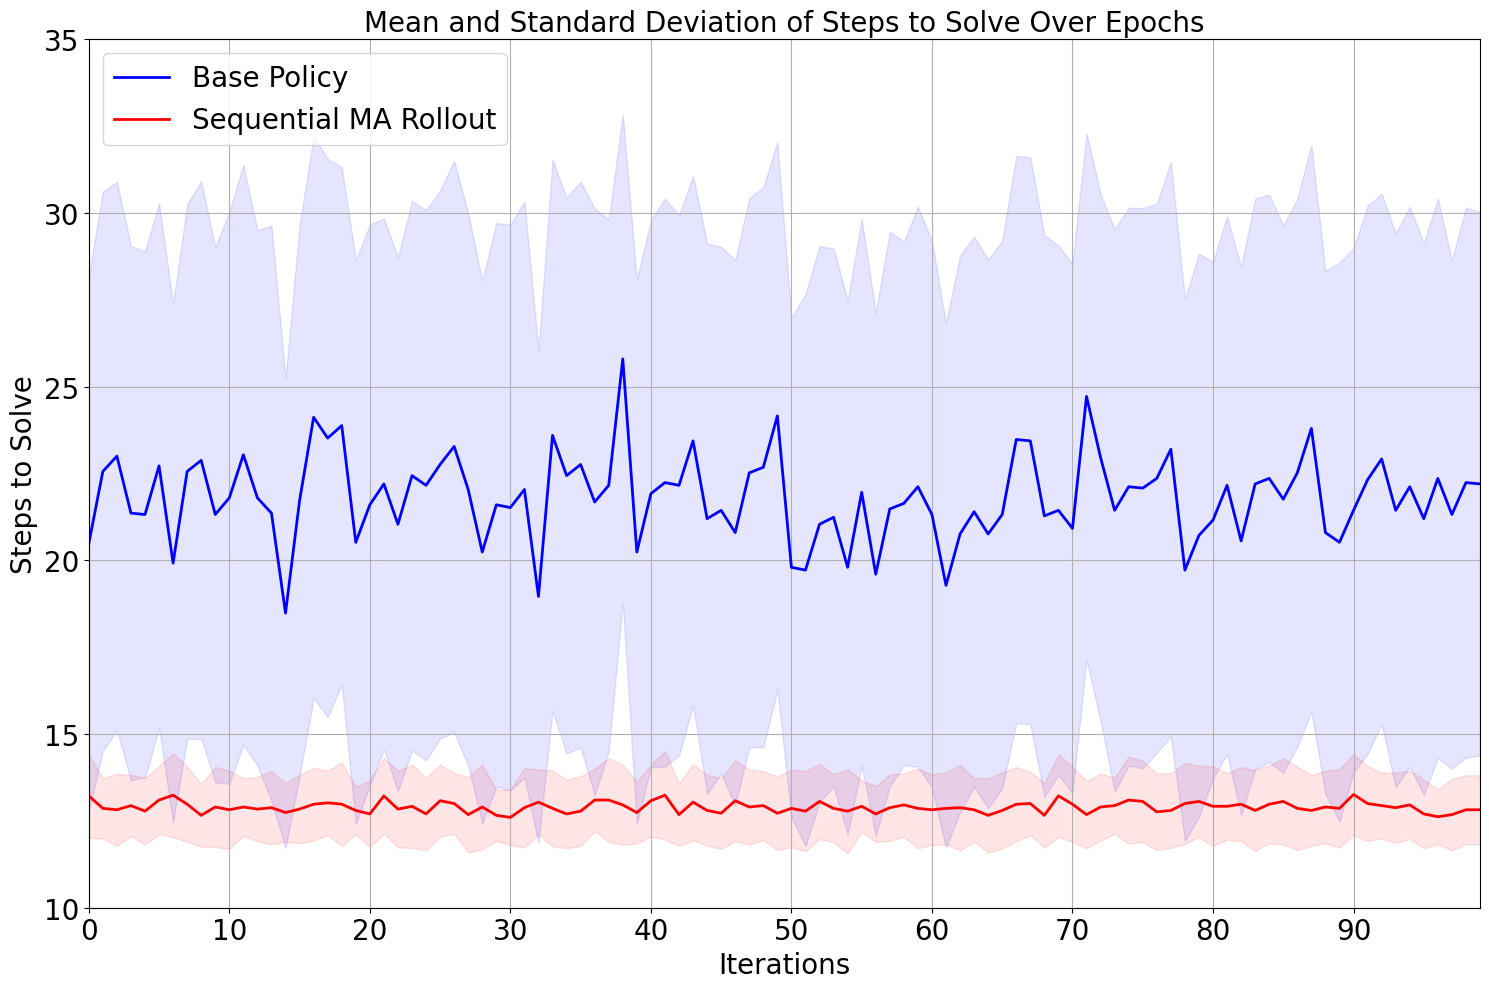

In [163]:
fzise= 20
def plot_with_shading(epochs, mean_values, std_values, color, label):
    """Function to plot mean with shaded standard deviation."""
    plt.plot(epochs, mean_values, color=color, label=label, linewidth=2)
    plt.fill_between(epochs, 
                     np.array(mean_values) - np.array(std_values), 
                     np.array(mean_values) + np.array(std_values), 
                     color=color, alpha=0.1, label=None)

epochs = [int(epoch) for epoch in bPEpochs]  # Ensure epochs are integers

plt.figure(figsize=(15, 10))

plot_with_shading(bPEpochs, bpMean, bpstd, bpColour, label='Base Policy')
plot_with_shading(sqRollEpochs, sqRollMean, sqRollstd, sqRollColour, label='Sequential MA Rollout')
#plot_with_shading(seqRandSigEpochs, seqRandSigMean, seqRandSigstd, seqRandSigColour, label='Sequential RandSig')
#plot_with_shading(ApproxSeqRollEpochs, ApproxSeqRollMean, ApproxSeqRollstd, ApproxSeqRollColour, label='Autonomous MA Rollout')

## Cross Implementations
#plot_with_shading(cross30Epochs, cross30Mean, cross30std, cross30Colour, label='Autonomous Agent from Uncertainty 2')
#plot_with_shading(cross30_BMEpochs, cross30_BMMean, cross30_BMstd, cross30_BMColour, label='Autonomous Agent from Uncertainty 2 BM')
#plot_with_shading(cross30_epochs_total, cross30_mean_total, cross30_std_total, cross30_Total_Colour, label='adaptation')





# Customize the plot
plt.title('Mean and Standard Deviation of Steps to Solve Over Epochs', fontsize=fzise)
plt.xlabel('Iterations', fontsize=fzise)
plt.ylabel('Steps to Solve', fontsize=fzise)
plt.legend(fontsize=fzise)
plt.grid(True)
plt.ylim(10, 35)
plt.xlim(0, 99)
plt.xticks(np.arange(min(epochs), max(epochs) + 1, 10), fontsize=fzise)
plt.yticks(fontsize=fzise)

plt.xticks(np.arange(min(epochs), max(epochs) + 1, 10))

plt.tight_layout()
plt.savefig(f"Sequential MA Rollout Line Graph.png")
plt.show()


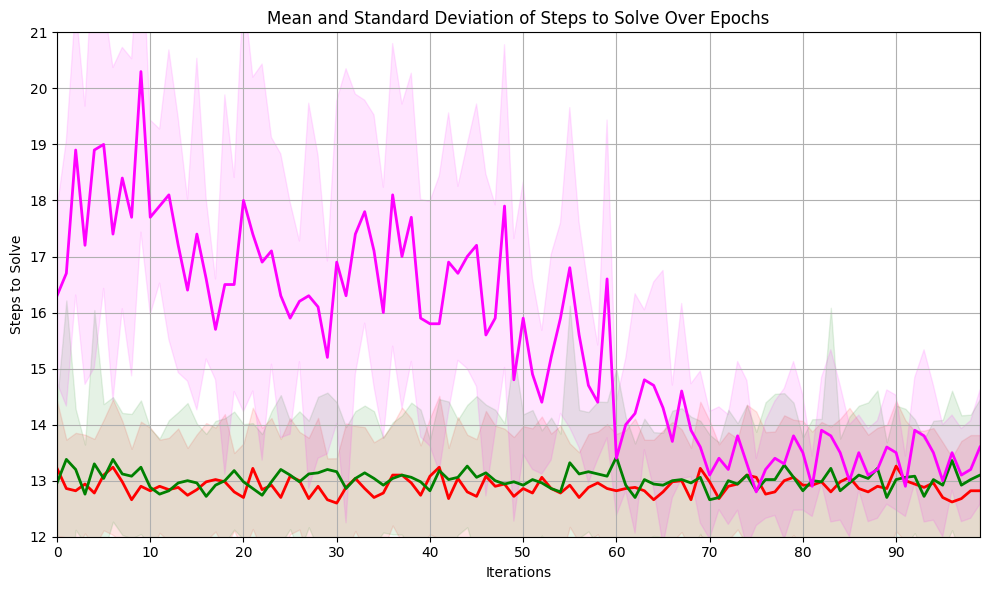

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Function to plot mean with shaded standard deviation
def plot_with_shading(epochs, mean_values, std_values, color, label):
    plt.plot(epochs, mean_values, color=color, label=label, linewidth=2)
    plt.fill_between(epochs, 
                     np.array(mean_values) - np.array(std_values), 
                     np.array(mean_values) + np.array(std_values), 
                     color=color, alpha=0.1, label=None)

# Ensure epochs are integers
epochs = [int(epoch) for epoch in cross30_epochs_total]

# Create folder to save images if it doesn't exist
save_folder = 'animation_frames'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

# Plot the static components
plt.figure(figsize=(10, 6))
plot_with_shading(sqRollEpochs, sqRollMean, sqRollstd, sqRollColour, label='Sequential Rollout - Uncertainty 1')
plot_with_shading(ApproxSeqRollEpochs, ApproxSeqRollMean, ApproxSeqRollstd, ApproxSeqRollColour, label='Autonomous Rollout - Uncertainty 1')

# Loop through each data point in the third histogram and save frames
for i in range(1, len(cross30_epochs_total) + 1):
    # Clear the previous plot (if any)
    plt.cla()

    # Plot the static components again
    plot_with_shading(sqRollEpochs, sqRollMean, sqRollstd, sqRollColour, label='Sequential Rollout - Uncertainty 1')
    plot_with_shading(ApproxSeqRollEpochs, ApproxSeqRollMean, ApproxSeqRollstd, ApproxSeqRollColour, label='Autonomous Rollout - Uncertainty 1')

    # Plot the third histogram up to the current data point
    plot_with_shading(cross30_epochs_total[:i], 
                      cross30_mean_total[:i], 
                      cross30_std_total[:i], 
                      cross30_Total_Colour, 
                      label='Adaptation')

    # Customize the plot
    plt.title('Mean and Standard Deviation of Steps to Solve Over Epochs')
    plt.xlabel('Iterations')
    plt.ylabel('Steps to Solve')
    plt.grid(True)
    plt.ylim(12, 21)
    plt.xlim(0, 99)
    
    # Set ticks
    plt.xticks(np.arange(min(epochs), max(epochs) + 1, 10))

    # Adjust layout
    plt.tight_layout()

    # Save the figure as an image for the current frame
    frame_filename = f'{save_folder}/frame_{i:03d}.png'
    plt.savefig(frame_filename)

# Final display of the last plot
plt.show()


In [309]:
cross30Mean

[14.44,
 14.66,
 15.06,
 14.82,
 14.42,
 14.52,
 14.96,
 14.5,
 14.92,
 14.68,
 14.42,
 14.74,
 14.86,
 14.8,
 14.6,
 14.36,
 15.12,
 15.02,
 14.56,
 14.88,
 14.44,
 15.12,
 14.88,
 14.66,
 14.26,
 14.2,
 14.98,
 14.76,
 14.76,
 14.66,
 14.6,
 14.78,
 14.02,
 14.64,
 14.24,
 14.38,
 13.92,
 14.9,
 14.74,
 14.5,
 14.7,
 14.0,
 15.1,
 14.36,
 14.16,
 15.54,
 14.5,
 14.4]

HISTOGRAMS

In [85]:
dfBasePolicy = getDataFrame(RuleBasedResults)
dfSeqRollout = getDataFrame(SequentialResults)
dfApproxSeqRoll = getDataFrame(ApproxSeqRoll)
dfRandSigPol = getDataFrame(sequential_randSig)
dfCrossMode = getDataFrame(cross_30)


    
minV = min([dfCrossMode.shape[0],dfRandSigPol.shape[0],dfApproxSeqRoll.shape[0],dfSeqRollout.shape[0],dfBasePolicy.shape[0]])

dfBasePolicy = normalizeDataFrames(dfBasePolicy,minV)
dfSeqRollout = normalizeDataFrames(dfSeqRollout,minV)
dfApproxSeqRoll = normalizeDataFrames(dfApproxSeqRoll,minV)
dfRandSigPol = normalizeDataFrames(dfRandSigPol,minV)
dfCrossMode = normalizeDataFrames(dfCrossMode,minV)

maxStepCount = max([dfBasePolicy["steps"].max(), dfSeqRollout["steps"].max(), dfApproxSeqRoll["steps"].max(), dfRandSigPol["steps"].max(), dfCrossMode["steps"].max()])
bin_edges = np.linspace(0, maxStepCount, 30)  # 50 bins



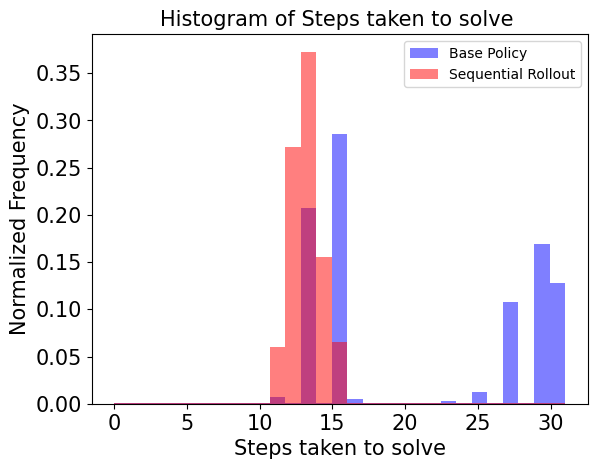

In [159]:
import matplotlib.pyplot as plt
import numpy as np

fzise= 15

# Plot both histograms on the same graph
plt.hist(dfBasePolicy.values.flatten(), bins=bin_edges, alpha=0.5, label='Base Policy', color='blue', density=True)
plt.hist(dfSeqRollout.values.flatten(), bins=bin_edges, alpha=0.5, label='Sequential Rollout', color='red', density=True)

# Add labels and title
plt.xlabel('Steps taken to solve', fontsize= fzise)
plt.ylabel('Normalized Frequency', fontsize= fzise)
plt.title('Histogram of Steps taken to solve ', fontsize= fzise)
plt.yticks(fontsize=fzise)
plt.xticks(fontsize=fzise)
# Add a legend
plt.legend()
plt.savefig(f"BP Seq Histogram.png")
# Show the plot
plt.show()


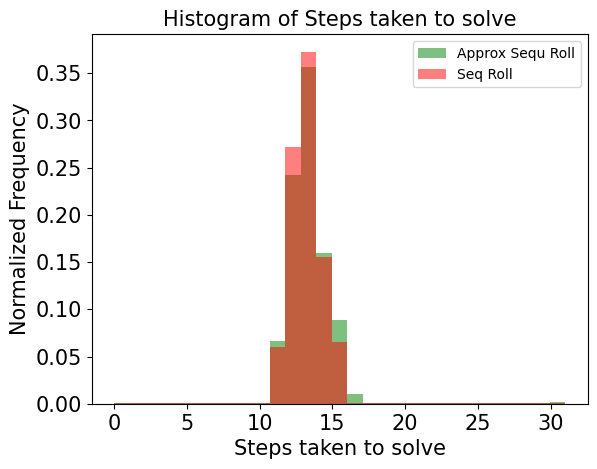

In [160]:
import matplotlib.pyplot as plt
import numpy as np
fzise= 15
# Plot both histograms on the same graph
plt.hist(dfApproxSeqRoll.values.flatten(), bins=bin_edges, alpha=0.5, label='Approx Sequ Roll', color='green', density=True)
plt.hist(dfSeqRollout.values.flatten(), bins=bin_edges, alpha=0.5, label='Seq Roll', color='red', density=True)
#plt.hist(dfRandSigPol.values.flatten(), bins=bin_edges, alpha=0.5, label='Seq Roll with Rand Sig', color='cyan', density=True)


# Add labels and title
plt.xlabel('Steps taken to solve', fontsize= fzise)
plt.ylabel('Normalized Frequency', fontsize= fzise)
plt.title('Histogram of Steps taken to solve', fontsize= fzise)
plt.yticks(fontsize=fzise)
plt.xticks(fontsize=fzise)
# Add a legend
plt.legend()
plt.savefig(f"Auto and Seq Roll Histogram.png")
# Show the plot
plt.show()


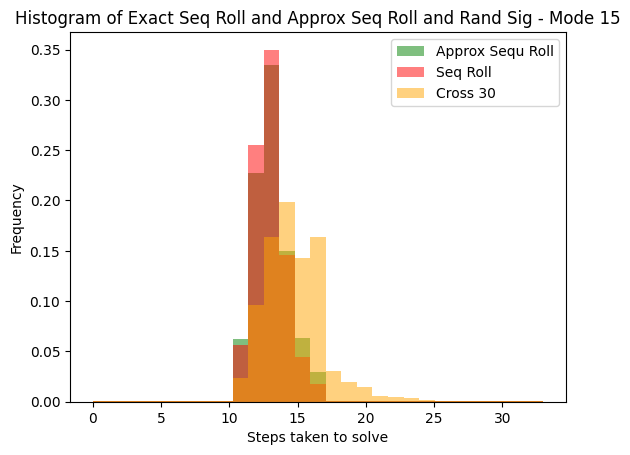

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# Plot both histograms on the same graph
plt.hist(dfApproxSeqRoll.values.flatten(), bins=bin_edges, alpha=0.5, label='Approx Sequ Roll', color='green', density=True)
plt.hist(dfSeqRollout.values.flatten(), bins=bin_edges, alpha=0.5, label='Seq Roll', color='red', density=True)
plt.hist(dfCrossMode.values.flatten(), bins=bin_edges, alpha=0.5, label='Cross 30', color='orange', density=True)


# Add labels and title
plt.xlabel('Steps taken to solve')
plt.ylabel('Frequency')
plt.title('Histogram of Exact Seq Roll and Approx Seq Roll and Rand Sig - Mode 15')

# Add a legend
plt.legend()

# Show the plot
plt.show()


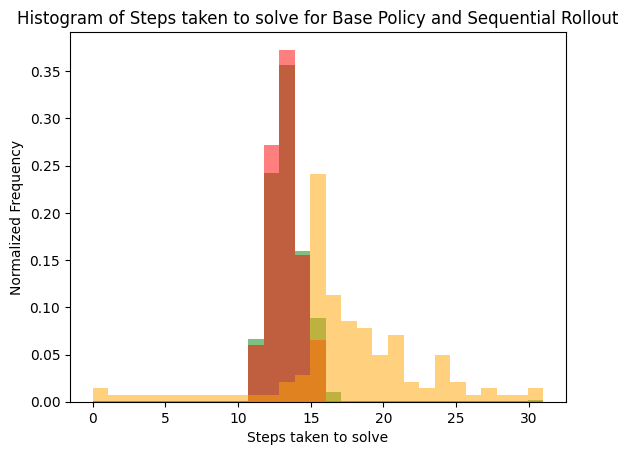

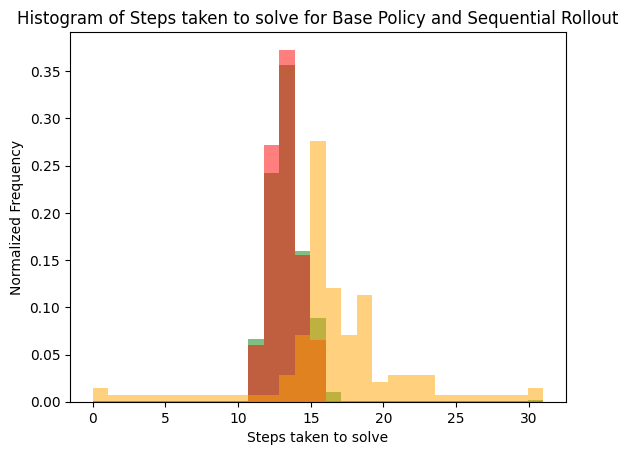

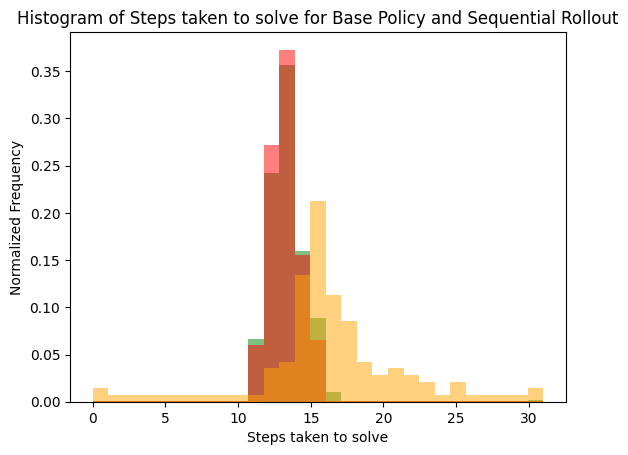

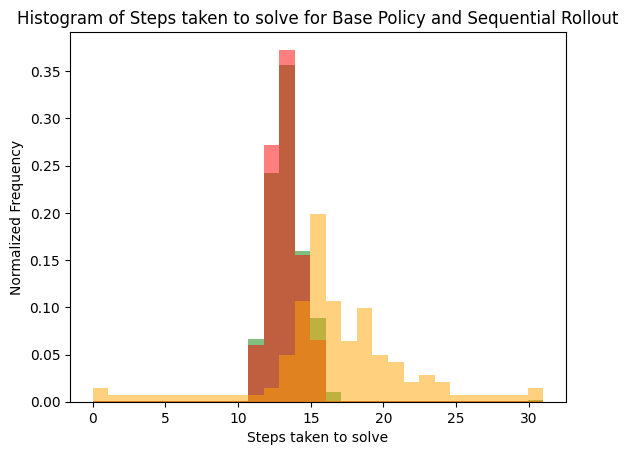

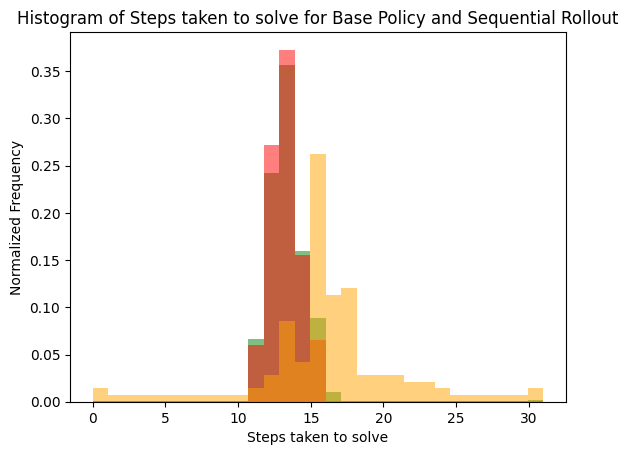

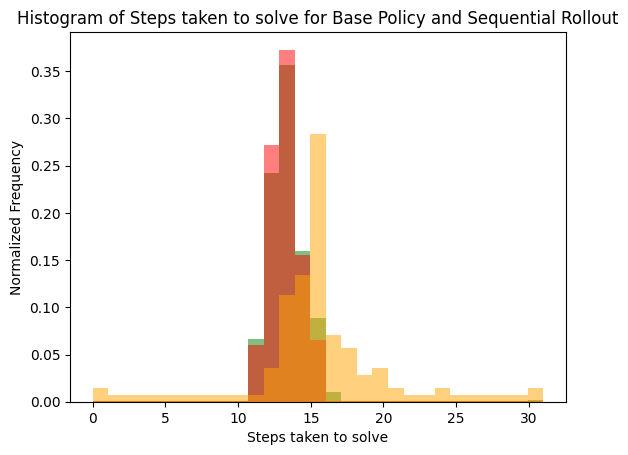

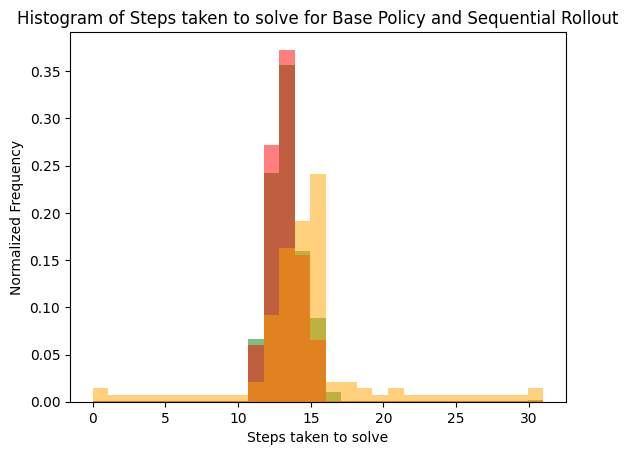

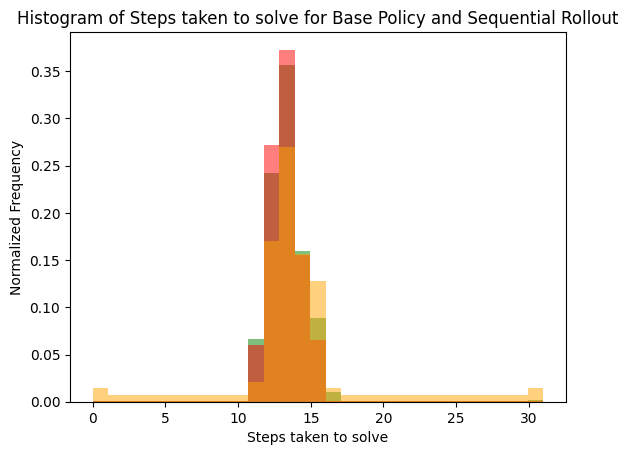

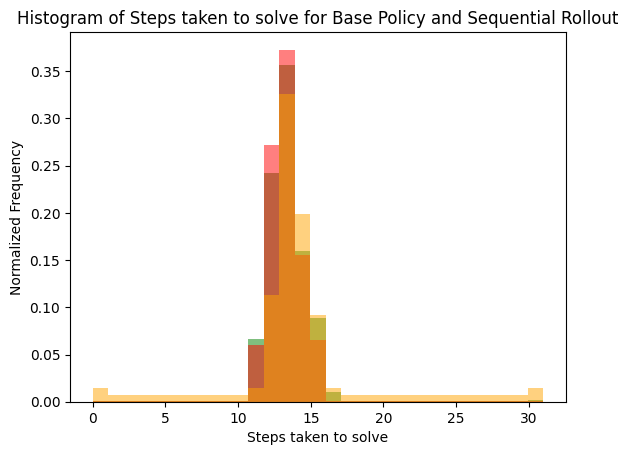

In [119]:
import matplotlib.pyplot as plt
import numpy as np


maxStepCount = max([dfApproxSeqRoll["steps"].max(),dfSeqRollout["steps"].max(),dfCross30_0["steps"].max(), dfCross30_1["steps"].max(),dfCross30_2["steps"].max(),dfCross30_3["steps"].max(),dfCross30_4["steps"].max(),dfCross30_5["steps"].max()])
bin_edges = np.linspace(0, maxStepCount, 30)  # 50 bins


# Plot both histograms on the same graph

data = [dfCross30_0, dfCross30_1, dfCross30_2, dfCross30_3, dfCross30_4, dfCross30_5,dfCross30_6,dfCross30_7,dfCross30_8]

for epoccc in range(9):
    epochPLot = epoccc
    plt.hist(dfApproxSeqRoll.values.flatten(), bins=bin_edges, alpha=0.5, label='Approx Sequ Roll', color='green', density=True)
    plt.hist(dfSeqRollout.values.flatten(), bins=bin_edges, alpha=0.5, label='Seq Roll', color='red', density=True)

    plt.hist(data[epochPLot].values.flatten(), bins=bin_edges, alpha=0.5, label=f'Cross from 30 - epoch {epochPLot}', color='orange', density=True)
    
    # Add labels and title
    plt.xlabel('Steps taken to solve')
    plt.ylabel('Normalized Frequency')
    plt.title('Histogram of Steps taken to solve for Base Policy and Sequential Rollout')
    
    # Add a legend
    #plt.legend()
    
    plt.savefig(f'adapting_histogram/histogram_plot_{epochPLot}.png', format='png')
    # Show the plot
    plt.show()





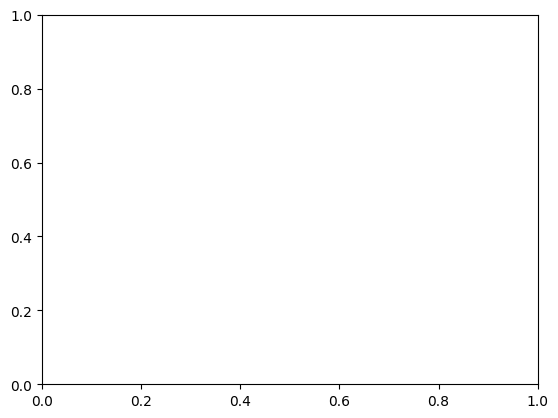

<h3>Load Sequential Rollout  plot</h3>

In [177]:
with open(SequentialResults, 'r') as file:
        data = json.load(file)
listOfWholeTraining = []
epochs = list(data.keys())

i = 0
for trainEpoch in epochs:
    epochData = data[str(trainEpoch)]
    for indData in epochData:
        steps = indData['StepsToSolve']
        listOfWholeTraining.append({"episode": i, "steps": steps})
        i += 1
print(len(listOfWholeTraining))
dfdfSeqRollout_noavg = pd.DataFrame(listOfWholeTraining)
dfSeqRollout = findMovingAvg(dfdfSeqRollout_noavg, windowSize)


5000


In [84]:
with open(sequential_rollout_RAND, 'r') as file:
        data = json.load(file)
listOfWholeTraining = []
epochs = list(data.keys())

i = 0
for trainEpoch in epochs:
    epochData = data[str(trainEpoch)]
    for indData in epochData:
        steps = indData['StepsToSolve']
        listOfWholeTraining.append({"episode": i, "steps": steps})
        i += 1
dfsequential_rollout_RAND_noavg = pd.DataFrame(listOfWholeTraining)
dfsequential_rollout_RAND = findMovingAvg(dfsequential_rollout_RAND_noavg, windowSize)

<h3>Load Approx Sequential Rollout  plot</h3>

In [182]:
with open(ApproxSeqRoll, 'r') as file:
        data = json.load(file)
listOfWholeTraining = []
epochs = list(data.keys())
print(len(epochs))
i = 0
for trainEpoch in epochs:
    epochData = data[str(trainEpoch)]
    for indData in epochData:
        steps = indData['StepsToSolve']
        listOfWholeTraining.append({"episode": i, "steps": steps})
        i += 1
print(len(listOfWholeTraining))
dfApproxSeqRoll = findMovingAvg(pd.DataFrame(listOfWholeTraining), windowSize)


52
2600


In [105]:
dfApproxNew_noavg  = pd.read_csv("approx15_new.csv")
dfApproxNew = findMovingAvg(dfApproxNew_noavg, windowSize)

<h3>Load Cross 30 and 60 Rollout  plot</h3>

In [189]:
with open(cross_30, 'r') as file:
        data = json.load(file)
listOfWholeTraining = []
epochs = list(data.keys())
print(len(epochs))
i = 0
for trainEpoch in epochs:
    epochData = data[str(trainEpoch)]
    for indData in epochData:
        steps = indData['StepsToSolve']
        listOfWholeTraining.append({"episode": i, "steps": steps})
        i += 1
print(len(listOfWholeTraining))        
dfcross_30_noavg = pd.DataFrame(listOfWholeTraining)
dfcross_30 = findMovingAvg(pd.DataFrame(listOfWholeTraining), windowSize)


48
2400


In [184]:

with open(cross_30_New, 'r') as file:
        data = json.load(file)
listOfWholeTraining = []
epochs = list(data.keys())
print(len(epochs))
i = 0
for trainEpoch in epochs:
    epochData = data[str(trainEpoch)]
    for indData in epochData:
        steps = indData['StepsToSolve']
        listOfWholeTraining.append({"episode": i, "steps": steps})
        i += 1
print(len(listOfWholeTraining))     
dfcross_30_New_noavg = pd.DataFrame(listOfWholeTraining)
dfcross_30_New = findMovingAvg(dfcross_30_New_noavg, windowSize)
dfcross_30_New_noavg.shape

100
1000


(1000, 2)

In [87]:
with open(adaptation_30_to_15_iter_1, 'r') as file:
        data = json.load(file)
listOfWholeTraining = []
epochs = list(data.keys())

i = 0
for trainEpoch in epochs:
    epochData = data[str(trainEpoch)]
    for indData in epochData:
        steps = indData['StepsToSolve']
        listOfWholeTraining.append({"episode": i, "steps": steps})
        i += 1


dfcross_30_1 = dfcross_30.copy()
dfcross_30_1["steps"] = dfcross_30_1["smoothed_steps"]
dfcross_30_1 = dfcross_30_1[["episode","steps"]]


dfadaptation_30_to_15_iter_1 = pd.DataFrame(listOfWholeTraining)
dfadapted_1 = pd.concat([dfcross_30_1, dfadaptation_30_to_15_iter_1], ignore_index=True)
dfadapted_1 = dfadapted_1.reset_index()
dfadapted_1["episode"] = dfadapted_1["index"]
dfadapted_1 = dfadapted_1[["episode","steps"]].copy()
dfadapted_1 = findMovingAvg(dfadapted_1, windowSize)


In [88]:
with open(adaptation_30_to_15_iter_2, 'r') as file:
        data = json.load(file)
listOfWholeTraining = []
epochs = list(data.keys())

i = 0
for trainEpoch in epochs:
    epochData = data[str(trainEpoch)]
    for indData in epochData:
        steps = indData['StepsToSolve']
        listOfWholeTraining.append({"episode": i, "steps": steps})
        i += 1


dfadapted_1_c = dfadapted_1.copy()
dfadapted_1_c["steps"] = dfadapted_1_c["smoothed_steps"]
dfadapted_1_c = dfadapted_1_c[["episode","steps"]].copy()


dfadaptation_30_to_15_iter_2 = pd.DataFrame(listOfWholeTraining)
dfadapted_2 = pd.concat([dfadapted_1_c, dfadaptation_30_to_15_iter_2], ignore_index=True)
dfadapted_2 = dfadapted_2.reset_index()
dfadapted_2["episode"] = dfadapted_2["index"]
dfadapted_2 = dfadapted_2[["episode","steps"]].copy()
dfadapted_2 = findMovingAvg(dfadapted_2, windowSize)

In [89]:
with open(cross_60, 'r') as file:
        data = json.load(file)
listOfWholeTraining = []
epochs = list(data.keys())

i = 0
for trainEpoch in epochs:
    epochData = data[str(trainEpoch)]
    for indData in epochData:
        steps = indData['StepsToSolve']
        listOfWholeTraining.append({"episode": i, "steps": steps})
        i += 1

dfcross_60 = findMovingAvg(pd.DataFrame(listOfWholeTraining), windowSize)


In [90]:
with open(cross_20, 'r') as file:
        data = json.load(file)
listOfWholeTraining = []
epochs = list(data.keys())

i = 0
for trainEpoch in epochs:
    epochData = data[str(trainEpoch)]
    for indData in epochData:
        steps = indData['StepsToSolve']
        listOfWholeTraining.append({"episode": i, "steps": steps})
        i += 1

dfcross_20 = findMovingAvg(pd.DataFrame(listOfWholeTraining), windowSize)


In [91]:
baseMean = dfBasePolicy['smoothed_steps'].mean()
seqMean = dfSeqRollout['smoothed_steps'].mean()
seqRandMean = dfsequential_rollout_RAND['smoothed_steps'].mean()
approxSeqMean = dfApproxSeqRoll['smoothed_steps'].mean()
cross30Mean = dfcross_30['smoothed_steps'].mean()
cross60Mean = dfcross_60['smoothed_steps'].mean()
cross20Mean = dfcross_20['smoothed_steps'].mean()


In [106]:
dfApproxNew.shape

(950, 2)

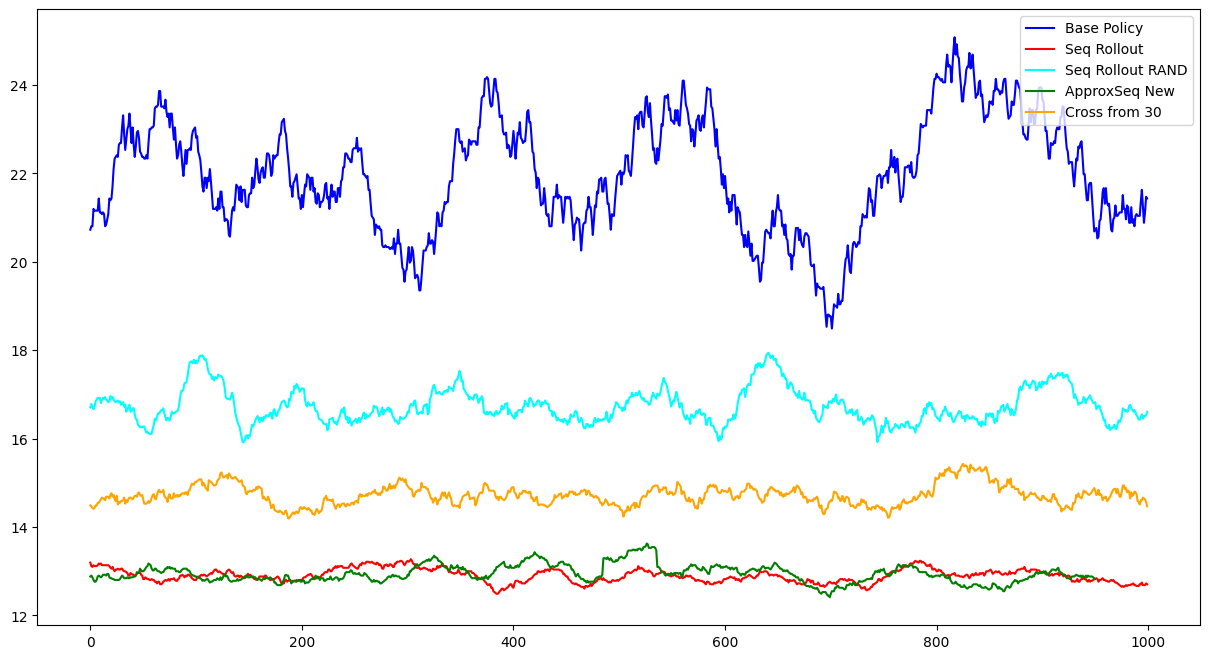

In [110]:
dfBasePolicy = dfBasePolicy.iloc[0:1000]
dfSeqRollout = dfSeqRollout.iloc[0:1000]
dfsequential_rollout_RAND = dfsequential_rollout_RAND.iloc[0:1000]
dfApproxSeqRoll = dfApproxSeqRoll.iloc[0:1000]
dfcross_30 = dfcross_30.iloc[0:1000]
dfApproxNew = dfApproxNew.iloc[0:1000]

plt.figure(figsize=(15, 8))
plt.plot(dfBasePolicy['episode'], dfBasePolicy['smoothed_steps'], label='Base Policy', color='blue', linestyle='-')
plt.plot(dfSeqRollout['episode'], dfSeqRollout['smoothed_steps'], label='Seq Rollout', color='red', linestyle='-')
plt.plot(dfsequential_rollout_RAND['episode'], dfsequential_rollout_RAND['smoothed_steps'], label='Seq Rollout RAND', color='cyan', linestyle='-')
plt.plot(dfApproxNew['episode'], dfApproxNew['smoothed_steps'], label='ApproxSeq New', color='green', linestyle='-')
plt.plot(dfcross_30['episode'], dfcross_30['smoothed_steps'], label='Cross from 30', color='orange', linestyle='-')
plt.legend(loc='upper right')

<h2>Plots</h2>

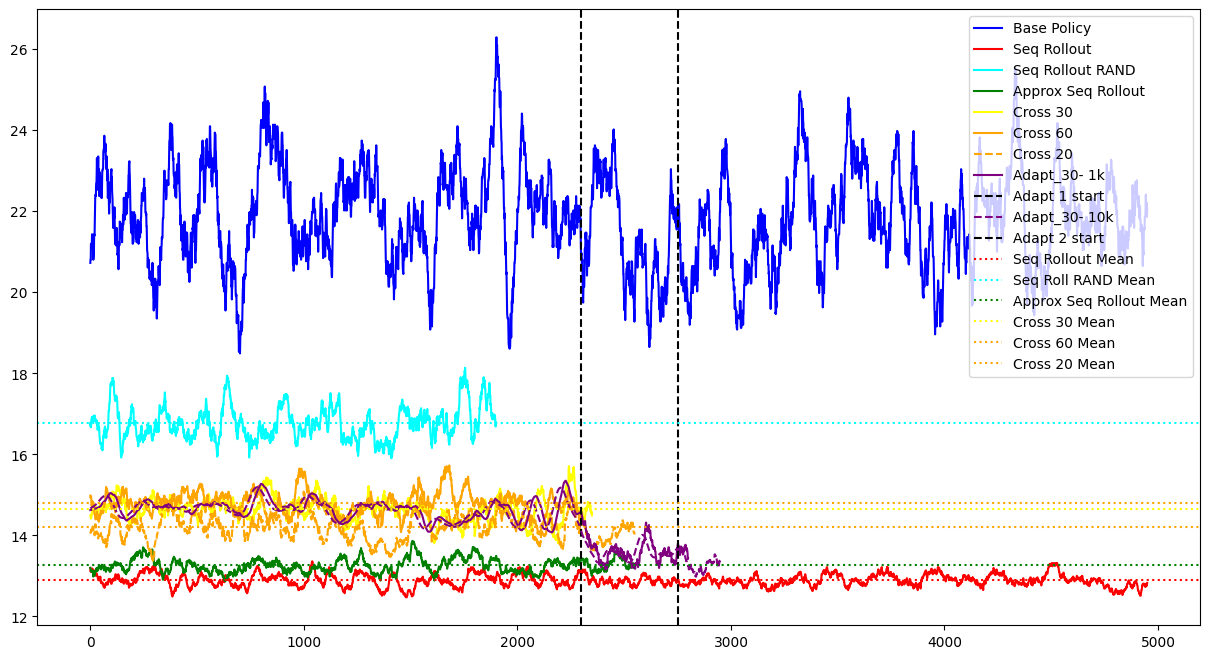

In [92]:
#dfBasePolicy = dfBasePolicy.iloc[0:1000]
#dfSeqRollout = dfSeqRollout.iloc[0:1000]
#dfsequential_rollout_RAND = dfsequential_rollout_RAND.iloc[0:1000]
#dfApproxSeqRoll = dfApproxSeqRoll.iloc[0:1000]
#dfcross_30 = dfcross_30.iloc[0:1000]
#dfcross_60 = dfcross_60.iloc[0:1000]
#dfcross_20 = dfcross_20.iloc[0:1000]

plt.figure(figsize=(15, 8))
plt.plot(dfBasePolicy['episode'], dfBasePolicy['smoothed_steps'], label='Base Policy', color='blue', linestyle='-')
plt.plot(dfSeqRollout['episode'], dfSeqRollout['smoothed_steps'], label='Seq Rollout', color='red', linestyle='-')
plt.plot(dfsequential_rollout_RAND['episode'], dfsequential_rollout_RAND['smoothed_steps'], label='Seq Rollout RAND', color='cyan', linestyle='-')

plt.plot(dfApproxSeqRoll['episode'], dfApproxSeqRoll['smoothed_steps'], label='Approx Seq Rollout', color='green', linestyle='-')
plt.plot(dfcross_30['episode'], dfcross_30['smoothed_steps'], label='Cross 30', color='yellow', linestyle='-')
plt.plot(dfcross_60['episode'], dfcross_60['smoothed_steps'], label='Cross 60', color='orange', linestyle='-')
plt.plot(dfcross_20['episode'], dfcross_20['smoothed_steps'], label='Cross 20', color='orange', linestyle='--')

plt.plot(dfadapted_1['episode'], dfadapted_1['smoothed_steps'], label='Adapt_30- 1k', color='purple', linestyle='-')
plt.axvline(x=dfcross_30.shape[0]-50, color='black', linestyle='--', label='Adapt 1 start')

plt.plot(dfadapted_2['episode'], dfadapted_2['smoothed_steps'], label='Adapt_30- 10k', color='purple', linestyle='--')
plt.axvline(x=dfadapted_1.shape[0]-50, color='black', linestyle='--', label='Adapt 2 start')

#plt.axhline(y=baseMean, color='blue', linestyle=':', label='Base Policy Mean')
plt.axhline(y=seqMean, color='red', linestyle=':', label='Seq Rollout Mean')
plt.axhline(y=seqRandMean, color='cyan', linestyle=':', label='Seq Roll RAND Mean')
plt.axhline(y=approxSeqMean, color='green', linestyle=':', label='Approx Seq Rollout Mean')
plt.axhline(y=cross30Mean, color='yellow', linestyle=':', label='Cross 30 Mean')
plt.axhline(y=cross60Mean, color='orange', linestyle=':', label='Cross 60 Mean')
plt.axhline(y=cross20Mean, color='orange', linestyle=':', label='Cross 20 Mean')



plt.legend(loc='upper right')

In [199]:
dfApproxNew.mean()

episode           474.500000
smoothed_steps     12.945635
dtype: float64